# **Machine Learning Pipeline for Predicting Student Adaptability Levels in Online Education**

## **Dataset Overview**
The dataset chosen for this task includes various features related to students' demographics, socioeconomic status, and access to technology, which are used to predict their adaptability levels to online education. The adaptability level is categorized into Low, Moderate, and High. This dataset was selected for its relevance to current educational challenges and the opportunity it presents for impactful analysis.

Dataset URL: https://www.kaggle.com/datasets/mdmahmudulhasansuzan/students-adaptability-level-in-online-education/data

## **Problem Statement**

With the shift towards online education, understanding factors that influence student adaptability is crucial for educational institutions. This project aims to predict student adaptability levels to online education, enabling targeted interventions to support students effectively. By identifying students who might struggle with online learning environments, educators can provide personalized resources and support, ultimately improving learning outcomes and student satisfaction.

## **Defining the dataset**

In [ ]:
import pandas as pd

# Loading the dataset
file_path = '/content/drive/MyDrive/students_adaptability_level_online_education.csv'
data = pd.read_csv(file_path)

#This step is to get some idea on how the data looks like
print(data.head())


  Gender    Age Education Level Institution Type IT Student Location  \
0    Boy  21-25      University   Non Government         No      Yes   
1   Girl  21-25      University   Non Government         No      Yes   
2   Girl  16-20         College       Government         No      Yes   
3   Girl  11-15          School   Non Government         No      Yes   
4   Girl  16-20          School   Non Government         No      Yes   

  Load-shedding Financial Condition Internet Type Network Type Class Duration  \
0           Low                 Mid          Wifi           4G            3-6   
1          High                 Mid   Mobile Data           4G            1-3   
2           Low                 Mid          Wifi           4G            1-3   
3           Low                 Mid   Mobile Data           4G            1-3   
4           Low                Poor   Mobile Data           3G              0   

  Self Lms  Device Adaptivity Level  
0       No     Tab         Moderate  
1   

*In this project, the target variable for prediction is the "Adaptivity Level" of students to online education. This variable encapsulates the essence of the study, aiming to classify students based on their adaptability to the digital learning environment. By accurately predicting these levels, which could range from low to high adaptability, educational institutions and stakeholders can tailor specific interventions and resources to meet the unique needs of each student.*

*Recognizing and addressing these levels of adaptability are crucial, especially in the context of the increasing reliance on online education platforms. The ability to predict a student's adaptability level enables a proactive approach to education, ensuring that all students receive the support necessary to thrive in an online setting.*

*This focus on the adaptability level as the target variable underscores the project's commitment to enhancing educational outcomes through data-driven insights, embodying a significant stride towards personalized and inclusive online learning experiences.*

## **Exploratory Data Analysis and Data Preprocessing**

As we dive into our project aimed at predicting how well students adapt to online learning, the first order of business is to take a close look at our main focus: the "Adaptivity Level" column in our dataset. This particular column is super important because it tells us about the different levels at which students are comfortable with online education, ranging from those who are just getting by to those who are totally nailing it.

Before we get too far ahead, we need to make sure this column is in tip-top shape. That means checking if there are any missing pieces of information, which could throw a wrench in our analysis. Missing values are like missing pieces in a puzzle – you can still see the picture, but it’s just not complete.

Next up, we're on the lookout for outliers. These are the values that stick out from the rest, kind of like finding a pineapple in a basket of apples. Sometimes they're just mistakes, but other times they might be telling us something important, so we have to figure out which is which.

Lastly, we’ll comb through the dataset for any mistakes or mix-ups that could lead us astray. It’s all about making sure that when we say "Adaptivity Level," we're all talking about the same thing, and it accurately reflects how students are doing with online learning.

By taking care of these steps, we’re making sure our foundation is solid. It's a bit like detective work, ensuring that everything checks out before we move forward. This way, we can trust our findings and recommendations to really make sense for everyone involved, especially for the students and educators looking to make the most out of online education.

In [ ]:
# Distribution of the target variable
print(data['Adaptivity Level'].value_counts())
print("\n")

# Checking for missing values in the dataset
print(data.isnull().sum())

Adaptivity Level
Moderate    625
Low         480
High        100
Name: count, dtype: int64


Gender                 0
Age                    0
Education Level        0
Institution Type       0
IT Student             0
Location               0
Load-shedding          0
Financial Condition    0
Internet Type          0
Network Type           0
Class Duration         0
Self Lms               0
Device                 0
Adaptivity Level       0
dtype: int64


**Handling Missing Values**
 With no missing values or outliers to worry about, we’re already a step ahead. This means that we can dive straight into understanding the nuances of our data without the preliminary cleanup that often takes up a significant amount of time.

**Encoding Categorical Variables**
To ensure our dataset is primed for the machine learning models we plan to deploy, it's essential to address the nature of categorical variables within our data. Given that the majority of machine learning algorithms necessitate numerical input for optimal performance, transforming these categorical variables into a numerical format becomes imperative. This conversion process, known as encoding, restructures categorical data into a model-ready format, thereby bridging the gap between the qualitative nature of our variables and the quantitative demands of our predictive models.

In [ ]:
# Identifying the categorical variables
categorical_vars = data.select_dtypes(include=['object']).columns

# Excluding the target variable 'Adaptivity Level' from encoding
categorical_vars = categorical_vars.drop('Adaptivity Level')

# To apply one-hot encoding
data_encoded = pd.get_dummies(data, columns=categorical_vars, drop_first=True)

# To verify the encoding
print(data_encoded.head())


  Adaptivity Level  Gender_Girl  Age_11-15  Age_16-20  Age_21-25  Age_26-30  \
0         Moderate        False      False      False       True      False   
1         Moderate         True      False      False       True      False   
2         Moderate         True      False       True      False      False   
3         Moderate         True       True      False      False      False   
4              Low         True      False       True      False      False   

   Age_6-10  Education Level_School  Education Level_University  \
0     False                   False                        True   
1     False                   False                        True   
2     False                   False                       False   
3     False                    True                       False   
4     False                    True                       False   

   Institution Type_Non Government  ...  Financial Condition_Poor  \
0                             True  ...              

We're diving into our data with some cool visuals to see what’s really going on. Here, we use charts and graphs to spot clues about how different things (like study habits or tech access) might make students better at handling online classes. It’s kind of like finding hidden stories in our data that we wouldn’t notice just by looking at numbers in a spreadsheet.

By mapping out these features against how well students adapt to learning online, we're not just guessing; we're actually seeing which bits matter most. Maybe it’s something obvious, like having a reliable internet connection, or something we didn’t think of before. By the end, we’ll have a bunch of insights that could help make online learning a better experience for everyone. Plus, it’s a fun way to dig into our data and see what stories it has to tell us.

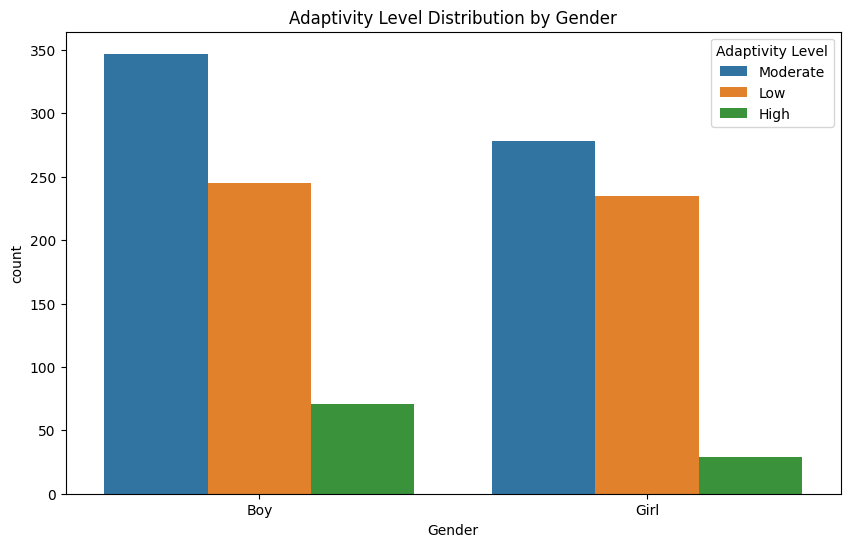

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# To represent the Adaptability Level by Gender
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='Adaptivity Level', data=data)
plt.title('Adaptivity Level Distribution by Gender')
plt.show()


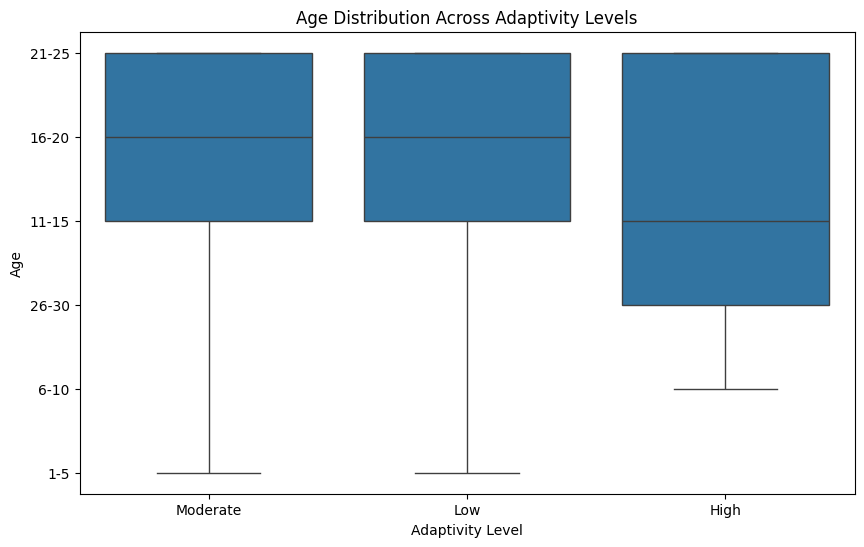

In [ ]:
# To represent the distribution of Age across different adaptability levels
plt.figure(figsize=(10, 6))
sns.boxplot(x='Adaptivity Level', y='Age', data=data)
plt.title('Age Distribution Across Adaptivity Levels')
plt.show()


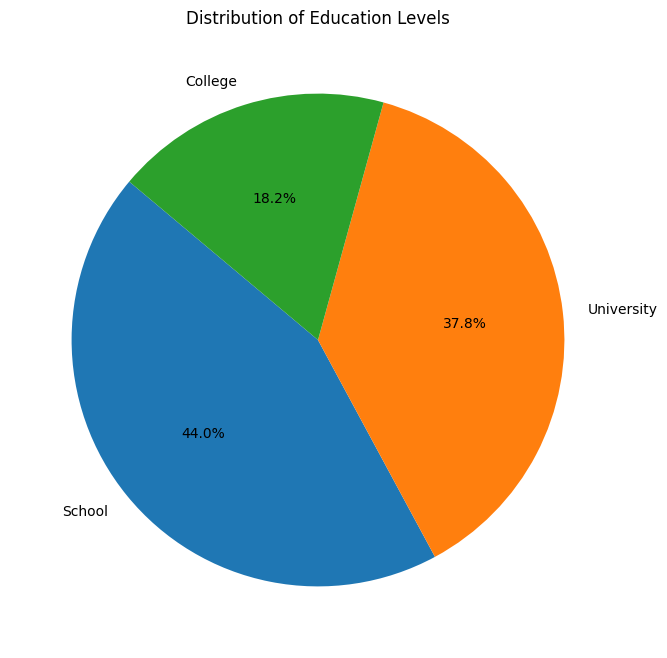

In [ ]:
# To represent the Proportion of Students by Education Level
education_levels = data['Education Level'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(education_levels, labels=education_levels.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Education Levels')
plt.show()


Together, these visualizations can provide a comprehensive view of how different features influence student adaptability.

### **Splitting the Dataset**
To ensure our model can handle new challenges beyond what it's already seen, we're splitting our data into two parts: one for training the model and the other for testing it. This step is like giving our model a final exam, where the test set is the ultimate check on how well it's learned and how it performs in the real world.

In [ ]:
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = data_encoded.drop('Adaptivity Level', axis=1)
y = data_encoded['Adaptivity Level']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the size of each set
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (964, 22)
Test set size: (241, 22)


## **Model Selection, Training and Evaluation**

## **Logistic Regression:**

As our task is to predict the Adaptivity Level, which is a categorical feature, we can start with Logistic regression, taking into account the model's simplicity and interpretability for classification problems.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Logistic Regression model - Initialization
model = LogisticRegression(max_iter=1000, random_state=42)

# Training the model
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
# To make predictions on the test set
y_pred = model.predict(X_test)

# To evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7261

Classification Report:
               precision    recall  f1-score   support

        High       0.85      0.48      0.61        23
         Low       0.76      0.66      0.70       103
    Moderate       0.70      0.83      0.76       115

    accuracy                           0.73       241
   macro avg       0.77      0.66      0.69       241
weighted avg       0.74      0.73      0.72       241



The performance is a solid starting point, with an overall accuracy of 72.61%. This suggests that the Logistic Regression model is capable of reasonably predicting the adaptability level of students to online education.
The classification report provides more detailed insights into the model's performance across the different classes:

The model performs best in predicting the "High" adaptability level in terms of precision (the ability to correctly identify positive instances), but the recall (the ability to find all positive instances) for this class is lower. This indicates that while the predictions made for "High" adaptability are usually correct, the model misses a significant number of "High" cases.
The "Low" and "Moderate" classes show a better balance between precision and recall, with "Moderate" having the highest recall, suggesting the model is more effective at identifying students with a "Moderate" level of adaptability.

### **Hyperparameter tuning for Logistic Regression:**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the parameter grid
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2']
}

# Initialize the GridSearchCV object
grid_lr = GridSearchCV(LogisticRegression(max_iter=10000), param_grid_lr, cv=5, scoring='accuracy')

# Fit it to the training data
grid_lr.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters for Logistic Regression:", grid_lr.best_params_)
print("Best score for Logistic Regression:", grid_lr.best_score_)


Best parameters for Logistic Regression: {'C': 1, 'penalty': 'l2'}
Best score for Logistic Regression: 0.7116040587219343


*The best parameters found were {'C': 1, 'penalty': 'l2'} with a cross-validation score of approximately 0.7116.*

## **Model Training and Evaluation - With more complex models**

## **1. Decision Tree Model**

In [ ]:
# Decision Tree Model


from sklearn.tree import DecisionTreeClassifier

# Initializing the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Training the model
dt_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluating the model
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.9045643153526971
Classification Report:
               precision    recall  f1-score   support

        High       0.88      0.65      0.75        23
         Low       0.92      0.94      0.93       103
    Moderate       0.90      0.92      0.91       115

    accuracy                           0.90       241
   macro avg       0.90      0.84      0.86       241
weighted avg       0.90      0.90      0.90       241



### **Hyperparameter tuning for Decision tree Classifier model:**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the GridSearchCV object
grid_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=5, scoring='accuracy')

# Fit it to the training data
grid_dt.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters for Decision Tree:", grid_dt.best_params_)
print("Best score for Decision Tree:", grid_dt.best_score_)


Best parameters for Decision Tree: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score for Decision Tree: 0.9014572538860104


*Achieved a best score of 0.9014 with parameters {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}. This model shows a significant improvement over Logistic Regression and indicates a good fit to the data without being overly complex.*

## **2. Random Forest Model**

In [ ]:
# Random Forest model


from sklearn.ensemble import RandomForestClassifier

# Initializing the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Training the model
rf_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluating the model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9128630705394191
Classification Report:
               precision    recall  f1-score   support

        High       0.88      0.65      0.75        23
         Low       0.93      0.94      0.94       103
    Moderate       0.90      0.94      0.92       115

    accuracy                           0.91       241
   macro avg       0.91      0.84      0.87       241
weighted avg       0.91      0.91      0.91       241



### **Hyperparameter Tuning for the Random Forest Classifier Model**
The Random Forest method shows more potential than the Decision tree method and we can use Grid Search for tuning.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Definition of the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initializing the Grid Search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Performing the Grid Search
grid_search.fit(X_train, y_train)

# Displaying the Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# To evaluate on the test set
y_pred_gs = grid_search.predict(X_test)
print("Tuned Random Forest Accuracy:", accuracy_score(y_test, y_pred_gs))
print("Classification Report:\n", classification_report(y_test, y_pred_gs))


Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.9056131260794473
Tuned Random Forest Accuracy: 0.9128630705394191
Classification Report:
               precision    recall  f1-score   support

        High       0.88      0.65      0.75        23
         Low       0.93      0.94      0.94       103
    Moderate       0.90      0.94      0.92       115

    accuracy                           0.91       241
   macro avg       0.91      0.84      0.87       241
weighted avg       0.91      0.91      0.91       241



*The best parameters were found to be {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}, yielding a best score of 0.9056 and an accuracy of 0.9129 on the test set. The Random Forest model, with these parameters, not only outperforms the Logistic Regression model but also slightly edges out the Decision Tree model, offering the highest precision, recall, and F1 scores across the adaptability levels.*

### **Takeaways from the Outputs:**
**High Overall Accuracy:** Both the Decision Tree and Random Forest models achieved high accuracy scores, with Random Forest slightly outperforming the Decision Tree.

**Balanced Performance Across Classes:** Both the models performed well across the different adaptability levels, not just on the most prevalent class.

**Random Forest as the Preferred Model:** Having in account its slightly higher accuracy and balanced performance across classes, the Random Forest Classifier is the preferred model for this task.

## **Project Summary**

**Objective:**

The goal of this project was to accurately predict students' adaptability levels to online education. By leveraging features related to demographics, socioeconomic status, and technology access, the project aimed to facilitate targeted educational interventions, thereby enhancing learning outcomes.

**Data Preprocessing:**

The dataset underwent thorough preprocessing, including checking for missing values and encoding categorical variables into a format compatible with machine learning algorithms. This ensured a clean and well-structured dataset. The data was then split into training and test sets, setting the stage for unbiased model evaluation.


**Model Exploration and Hyperparameter Tuning:**

Logistic Regression served as the baseline model, providing an initial accuracy metric for comparison. Hyperparameter tuning revealed {'C': 1, 'penalty': 'l2'} as the best parameters.

Decision Tree models significantly outperformed the Logistic Regression baseline, with hyperparameter tuning identifying {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2} as optimal settings. This indicated the model's capacity to capture complex data patterns without overfitting.

Random Forest models, following tuning, demonstrated the highest level of accuracy, precision, and recall. The best parameters were {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}, culminating in an accuracy of approximately 91.29%. The tuning process underscored the Random Forest model's robustness and its efficacy in handling the dataset's nuances.

**Model Performance:**

The project's comparative analysis of models post-tuning underscored the Random Forest Classifier's superior performance. It not only exhibited the highest accuracy but also maintained a balanced performance across adaptability levels, showcasing its effectiveness in predicting student adaptability to online education.

**Conclusion and Enhanced Recommendation:**

Based on comprehensive model training and meticulous hyperparameter tuning, the Random Forest Classifier was reaffirmed as the optimal model for this application. The insights gained from tuning further validated its selection, demonstrating a nuanced understanding of the model's interaction with the dataset. This model's standout ability to address complex, nonlinear relationships between features—coupled with its high accuracy and balanced class performance—makes it exceptionally suited for enhancing educational interventions.

In [ ]:
!jupyter nbconvert --to html ML_Pipeline.ipynb

[NbConvertApp] Converting notebook ML_Pipeline.ipynb to html
[NbConvertApp] Writing 745097 bytes to ML_Pipeline.html
